**Practical 4: **
Aim: Fit Following algorithm to generate models to a given data and compare different
evaluation measures (F-measures, confusion Matrix, RMSE etc.). Linear Regression,
Logistic Regression, K Nearest Neighbours,(use Sci-kit-learn library)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
log_dataset = pd.read_csv('../input/fashion-mnist_train.csv')
labels = log_dataset['label'].values
features= log_dataset.drop(['label'],axis = 1).values
print(labels.shape)
print(features.shape)



(60000,)
(60000, 784)


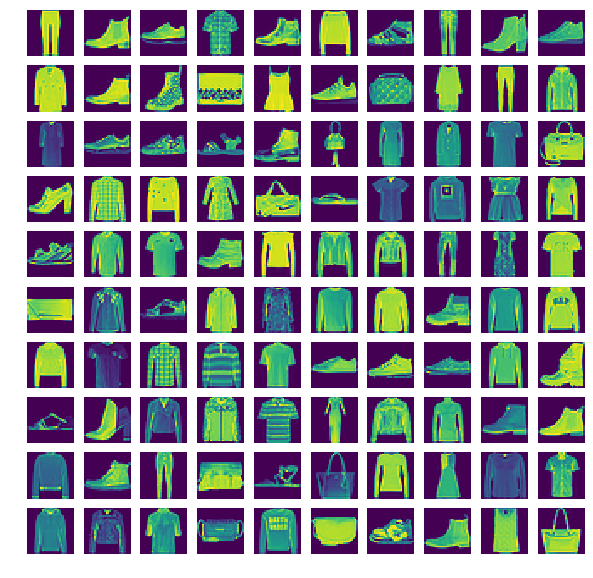

In [3]:
_, axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axarr[i,j].imshow(features[np.random.randint(features.shape[0])].reshape((28,28)))
        axarr[i,j].axis('off')


In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')

history = model.fit(features, labels)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

test_dataset = pd.read_csv('../input/fashion-mnist_test.csv')
print(test_dataset.shape)
test_labels = test_dataset['label'].values
test_features = test_dataset.drop(['label'],axis = 1).values
y_pred = model.predict(test_features)

(10000, 785)


array([[817,  11,  18,  31,   7,   0,  96,   0,  19,   1],
       [  1, 976,   4,  13,   0,   2,   4,   0,   0,   0],
       [ 14,   2, 762,  13, 122,   0,  75,   0,  12,   0],
       [ 30,  28,  16, 871,  29,   0,  23,   0,   3,   0],
       [  1,   2,  72,  34, 822,   1,  65,   0,   3,   0],
       [  2,   2,   0,   0,   0, 883,   1,  64,  10,  38],
       [147,   7, 106,  31, 109,   0, 584,   0,  16,   0],
       [  0,   0,   0,   0,   0,  27,   0, 932,   1,  40],
       [  2,   2,   9,   2,   5,   7,  17,   4, 950,   2],
       [  0,   0,   0,   0,   0,  14,   0,  36,   3, 947]])

In [8]:
accuracy_score(test_labels, y_pred)

0.8544

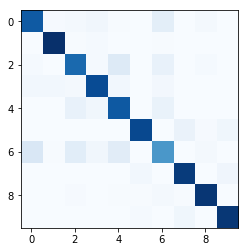

In [6]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)